## Victorian Road Accident Data Viz
### Parth Parekh 
##### https://github.com/parthatulparekh/VIC_Road_Accident

In [178]:
%pip install openpyxl --quiet
%pip install plotly --quiet
%pip install matplotlib --quiet

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [143]:
file_path = "Dataset A_BNE - Road Accident Data (1).xlsx"
df = pd.read_excel(file_path, sheet_name=1)

In [236]:
df.head(2)

,ACCIDENT_NO,ACCIDENT_DATE,ACCIDENT_TIME,ACCIDENT_DESCRIPTION,DCA_CODE_DESCRIPTION,DCA_CODE_TYPE,LIGHT_CONDITION_DESCRIPTION,NO_PERSONS_INVOLVED,NO_PERSONS_KILLED,NO_PERSONS_INJ_SERIOUS,...,ROAD_NAME_2,ROAD_TYPE_2,DIRECTION_LOCATION,DIRECTORY,EDITION,PAGE,GRID_REFERENCE_X,GRID_REFERENCE_Y,LGA_NAME,REGION_NAME
0,T20110000012,2011-01-01,01:06:00,Struck pedestrian,Near side,Pedestrian on foot/toy/pram,Dark street lights on,2,0,0,...,THE ESPLANADE,NaN,NaN,MEL,ED35,92,K,9,KINGSTON,METROPOLITAN SOUTH EAST REGION
1,T20110000014,2011-01-01,00:15:00,Collision with a fixed object,Left off carriageway into object/parked vehicle,Off path on straight,Dark street lights on,1,0,1,...,LORIMER,STREET,NaN,MEL,ED35,20,H,2,BANYULE,METROPOLITAN NORTH WEST REGION


In [6]:
# Getting name of the day of the week
df['Day_Name'] = df['ACCIDENT_DATE'].dt.day_name()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25484 entries, 0 to 25483
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   ACCIDENT_NO                       25484 non-null  object        
 1   ACCIDENT_DATE                     25484 non-null  datetime64[ns]
 2   ACCIDENT_TIME                     25484 non-null  object        
 3   ACCIDENT_DESCRIPTION              25484 non-null  object        
 4   DCA_CODE_DESCRIPTION              25484 non-null  object        
 5   DCA_CODE_TYPE                     25484 non-null  object        
 6   LIGHT_CONDITION_DESCRIPTION       25484 non-null  object        
 7   NO_PERSONS_INVOLVED               25484 non-null  int64         
 8   NO_PERSONS_KILLED                 25484 non-null  int64         
 9   NO_PERSONS_INJ_SERIOUS            25484 non-null  int64         
 10  NO_PERSONS_INJ_MEDICAL_ATTENTION  25484 non-nu

In [248]:
#Checking for total null values in each column
#df.isnull().sum().head(14) #No null columns value present
df.isnull().sum().tail(20)

ROAD_GEOMETRY_DESCRIPTION        0
SEVERITY                         0
SEVERITY_DESCRIPTION             0
SPEED_ZONE                       0
LOCATION_TYPE                    0
LOCALS_INVOLVED                  0
LON                              0
LAT                              0
ROAD_NAME_1                      1
ROAD_TYPE_1                    441
ROAD_NAME_2                     33
ROAD_TYPE_2                   1416
DIRECTION_LOCATION           13478
DIRECTORY                        0
EDITION                          0
PAGE                             0
GRID_REFERENCE_X                 0
GRID_REFERENCE_Y                 0
LGA_NAME                         0
REGION_NAME                      0
dtype: int64

In [8]:
#Dropping "DIRECTION_LOCATION" because of having about 50% NULL values and also unwanted column for analysis
df.drop('DIRECTION_LOCATION', axis=1,inplace=True)

In [9]:
# dt = datetime.now()
# time = dt.time()
# print(time)
# sixam = time.replace(hour=6,minute=00,second=00,microsecond=00)
# sixpm = time.replace(hour=18,minute=00,second=00,microsecond=00)

# for df['ACCIDENT_TIME'], row in df.iterrows():
#     if df.ACCIDENT_TIME > sixpm:
#         df["DayNight"] = "Night"
#     elif df.ACCIDENT_TIME < sixam:
#         df["DayNight"] = "Night"
#     else:
#        df["DayNight"] = "Day"

#### Visualising lighting conditions to understand the rate of accident

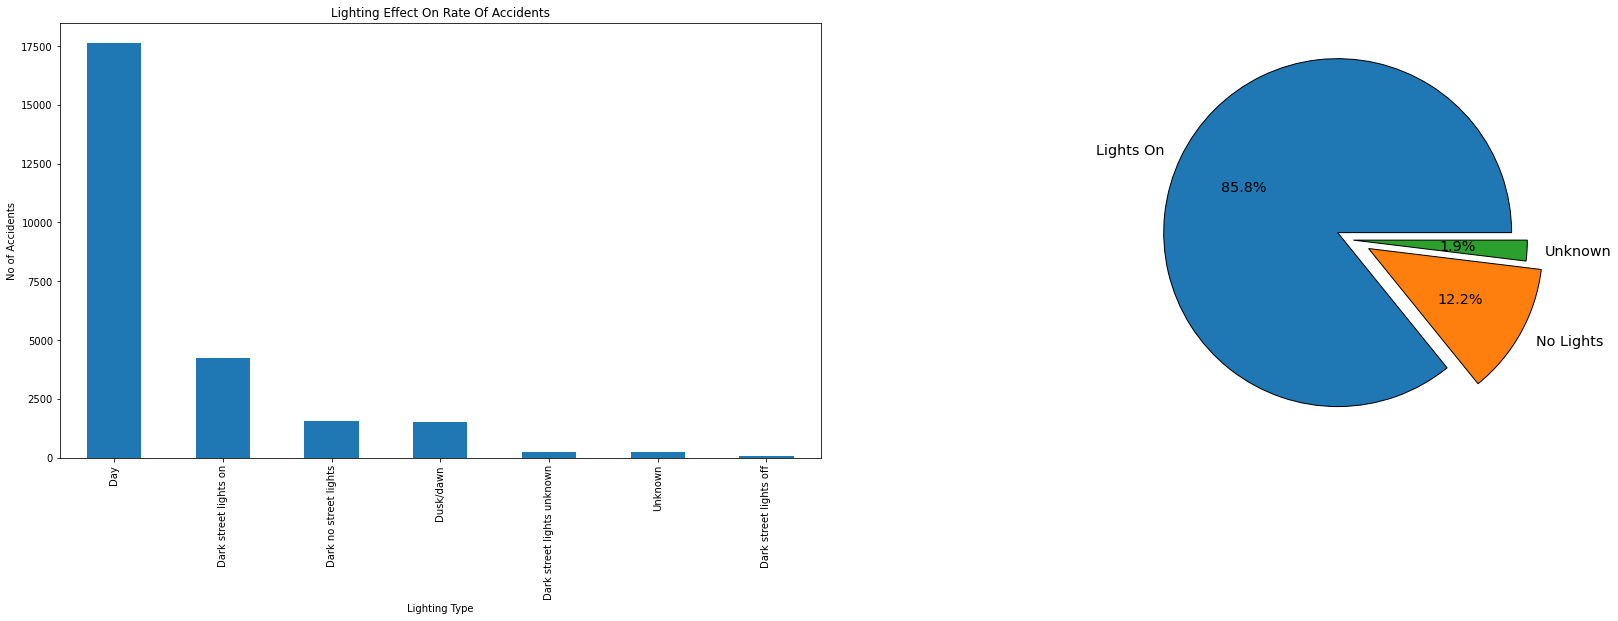

In [250]:
plt.subplot(121)
# A bar plot to understand which lightning condition has more accidents
ax = df['LIGHT_CONDITION_DESCRIPTION'].value_counts().plot(kind='bar',figsize=(30,8),title="Lighting Effect On Rate Of Accidents")
ax.set_xlabel("Lighting Type")
ax.set_ylabel("No of Accidents")



#Dividing Lighting condition in 3 major categories
light_on = df[df['LIGHT_CONDITION_DESCRIPTION'].str.contains('Day') | df['LIGHT_CONDITION_DESCRIPTION'].str.contains('Dark street lights on')] #Day or good lighting condition
dark = df[df['LIGHT_CONDITION_DESCRIPTION'].str.contains('Dusk/dawn') | df['LIGHT_CONDITION_DESCRIPTION'].str.contains('Dark street lights off') | df['LIGHT_CONDITION_DESCRIPTION'].str.contains('Dark no street lights')]# dark/poor lightinh condition
unknown = df[df['LIGHT_CONDITION_DESCRIPTION'].str.contains('unknown') | df['LIGHT_CONDITION_DESCRIPTION'].str.contains('Unknown')] #Unknown


plt.subplot(122)
#Pie chart to understand the major lighting conditions
z = np.array([len(light_on), len(dark), len(unknown)])
label = ["Lights On", "No Lights", "Unknown"]
#fig = plt.figure(figsize = (10,7))
explode = (0.1, 0.1, 0.0)
pie = plt.pie(z, labels=label, explode=explode, autopct='%.1f%%', wedgeprops={'linewidth' : 1, 'edgecolor': 'black'}, textprops={'color' : 'black', 'size':'x-large'})


plt.show()

##### From the above visuals it is clear that poor lighting or dark lighting condition is not a reason for higher rate of accident. About 86% accidents take place during day time or good lighting condition

#### Visualising speed limits in realtion with the number of accidents to understand the stimuli

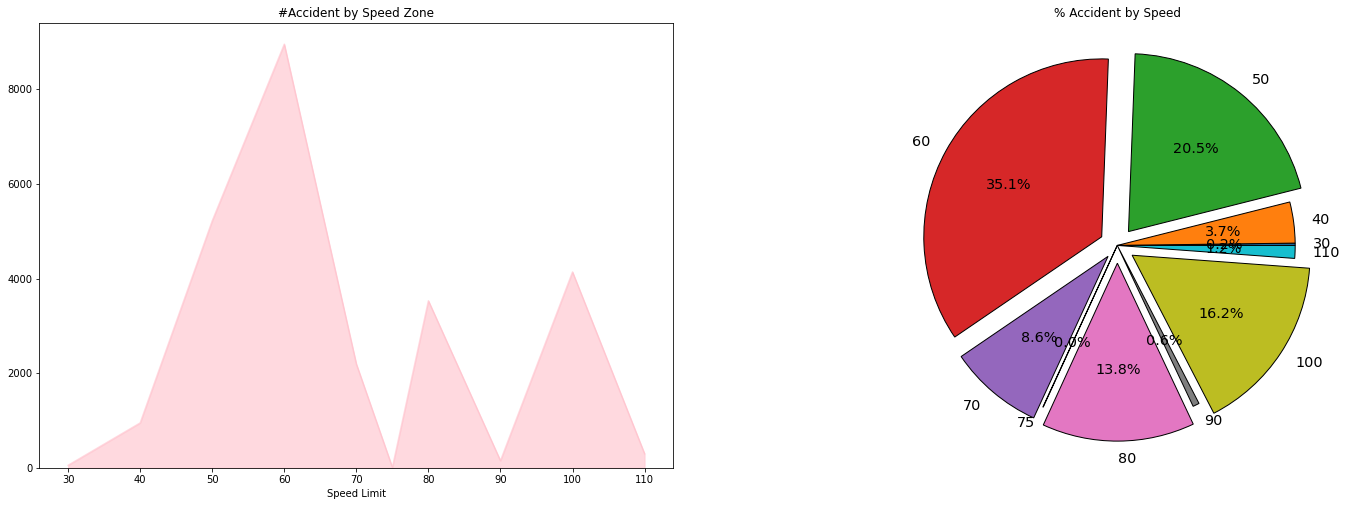

In [11]:
fig1 = plt.subplot2grid((2,2),(0,0))
df2 = df.groupby('SPEED_ZONE')['SPEED_ZONE'].count()
ax = df2.plot.area(title = '#Accident by Speed Zone', xlabel='Speed', color="pink", alpha=0.6)
ax.set_xlabel('Speed Limit')
ax.plot(color = "red", alpha=0.8)



fig1 = plt.subplot2grid((2,2),(0,1))
explode = (0,0,0.1,0.1,0.08,0,0.1,0,0.1,0)
df.groupby('SPEED_ZONE')['SPEED_ZONE'].count().plot(kind='pie', title='% Accident by Speed Limit',figsize=(25,18), label='', autopct='%.1f%%', explode=explode,wedgeprops={'linewidth' : 1, 'edgecolor': 'black'}, textprops={'color' : 'black', 'size':'x-large'})


plt.show()

##### Evidential from the above visuals, the rate of accident increases as the speed limit increases

In [136]:
# ax = df.SPEED_ZONE.unique().tolist()
# ay = df.loc[df['SEVERITY'] == 1]
# ay2 = ay.groupby(['SPEED_ZONE'])['SEVERITY'].count().sort_index()
# s1 = ay2.tolist()
# ay = df.loc[df['SEVERITY'] == 2]
# ay2 = ay.groupby(['SPEED_ZONE'])['SEVERITY'].count()
# s2 = ay2.tolist()
# ay = df.loc[df['SEVERITY'] == 3]
# ay2 = ay.groupby(['SPEED_ZONE'])['SEVERITY'].count()
# s3 = ay2.tolist()
# df4 = pd.DataFrame({'SPEED_ZONE': pd.Series(ax), 'SEVERITY_1': pd.Series(s1), 'SEVERITY_2': pd.Series(s2), 'SEVERITY_3': pd.Series(s3)}).fillna(0)
# #df4.sort_values('SPEED_ZONE').plot.bar(x='SPEED_ZONE', stacked=True,figsize=(25,12))
# df4.plot.bar(x='SPEED_ZONE', stacked=True,figsize=(25,12))

#### Accidenet Severity

<AxesSubplot:title={'center':'Severity by Speed Zone'}, xlabel='SPEED_ZONE'>

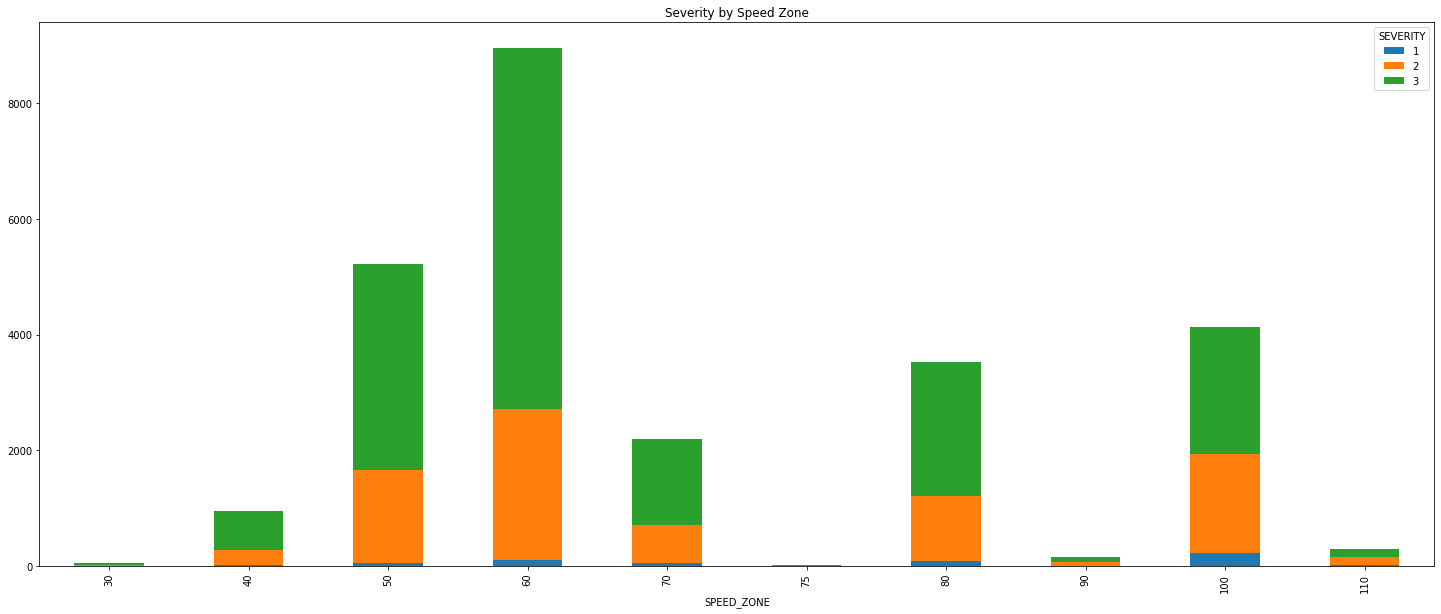

In [154]:
df_new = df.groupby(['SPEED_ZONE','SEVERITY'])['ACCIDENT_NO'].count().reset_index(name="Total")
stacked_plot = pd.pivot_table(df_new, index=['SPEED_ZONE'], columns='SEVERITY',values='Total')
stacked_plot.plot.bar(title='Severity by Speed Zone',stacked=True,figsize=(25,10))

##### The chart above is suggestive of the fact that the accidents are severe at higher speed zones. As seen more fatal accidents take palce at speed limits 60 and above. These further leads to two analysis of casualties and region where accidents takes place

#### Casualties/Serious Injuries

<AxesSubplot:title={'center':'Casualties by Speed Zone'}, xlabel='SPEED_ZONE'>

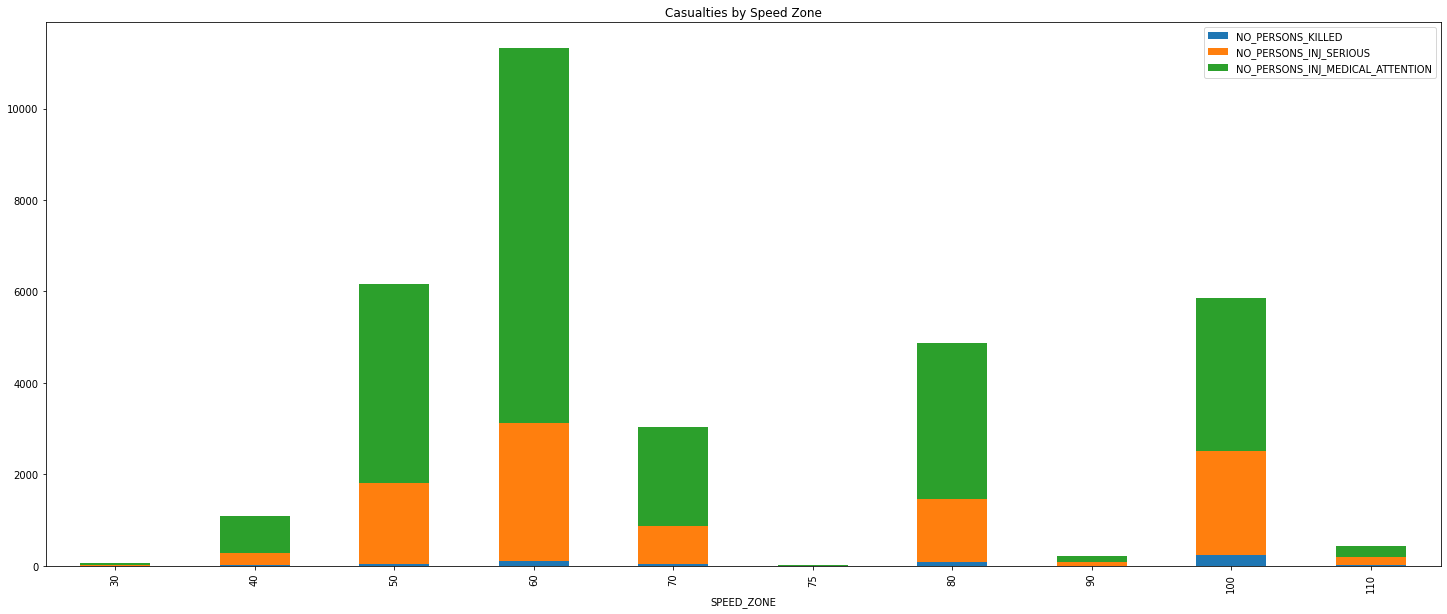

In [258]:
df_new2 = df.groupby(['SPEED_ZONE'])[['NO_PERSONS_KILLED','NO_PERSONS_INJ_SERIOUS','NO_PERSONS_INJ_MEDICAL_ATTENTION']].apply(sum)
df_new2.plot.bar(title='Casualties by Speed Zone',stacked=True,figsize=(25,10))

##### The rate f accident and severity keeps increasing after 50 speed limit zones

#### Accident Region

<AxesSubplot:title={'center':'Casualties by Region'}, xlabel='REGION_NAME'>

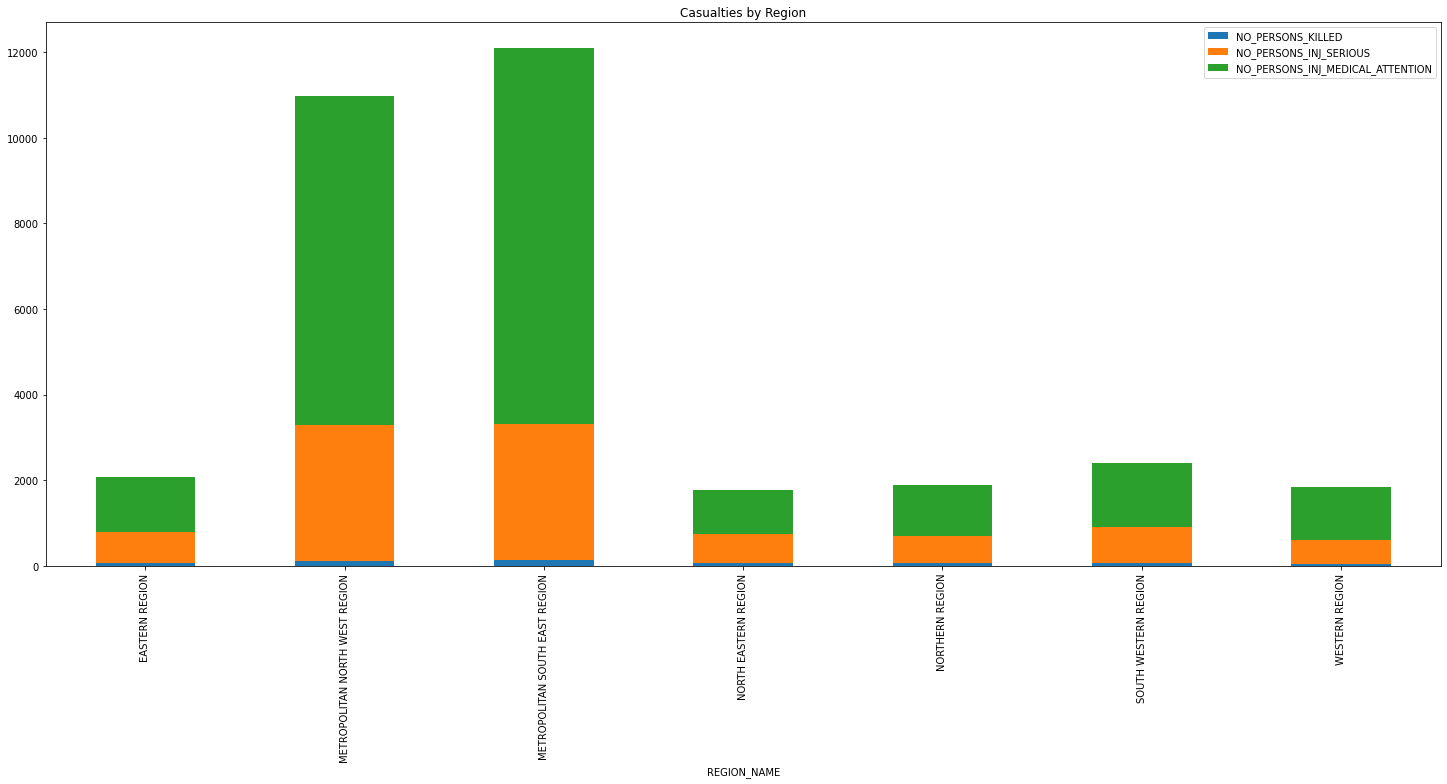

In [259]:
df_new5 = df.groupby(['REGION_NAME'])[['NO_PERSONS_KILLED','NO_PERSONS_INJ_SERIOUS','NO_PERSONS_INJ_MEDICAL_ATTENTION']].apply(sum)
df_new5.plot.bar(title='Casualties by Region',stacked=True,figsize=(25,10))

<AxesSubplot:title={'center':'Road Type by no accidents'}, xlabel='ROAD_TYPE_1'>

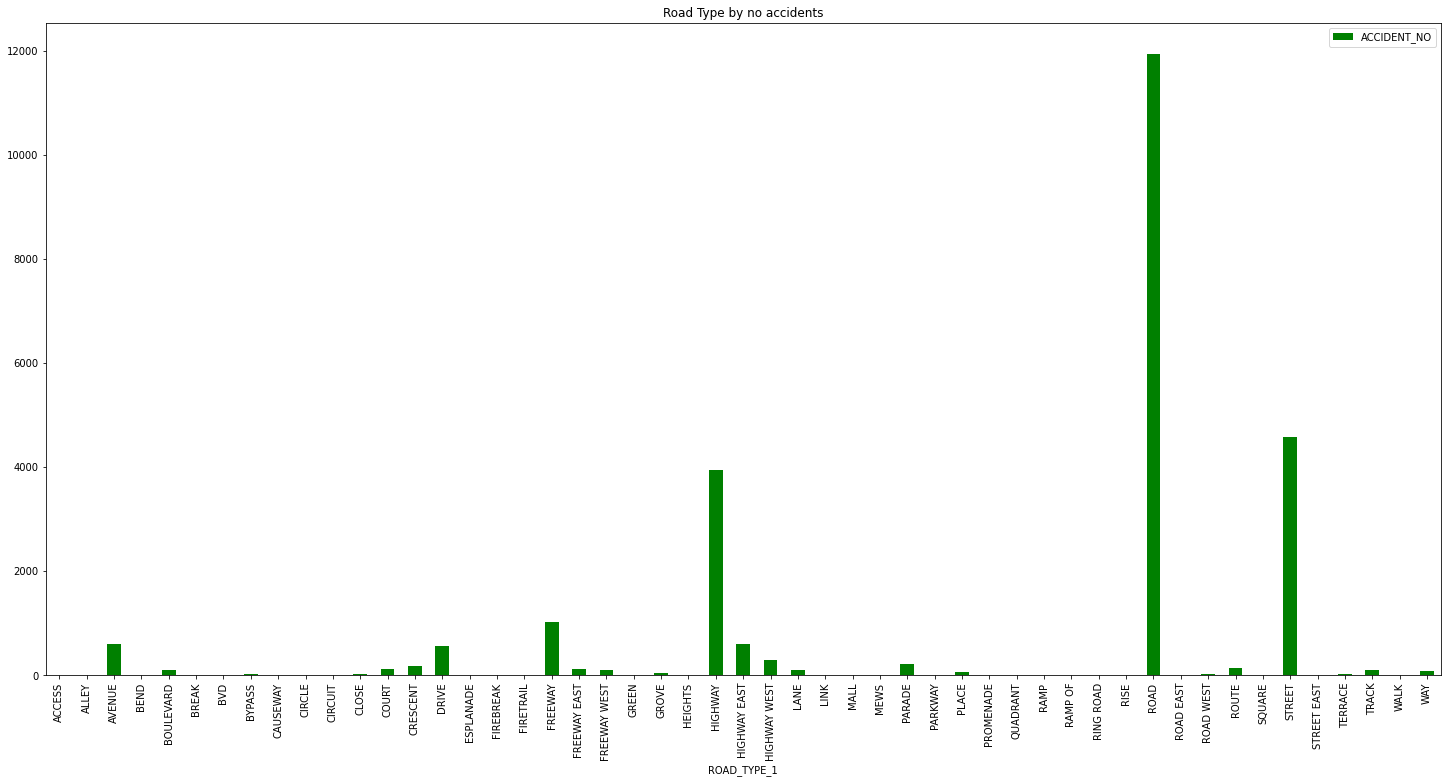

In [260]:
df_new4 = df.groupby(['ROAD_TYPE_1'])[['ACCIDENT_NO']].count()
df_new4.plot.bar(title='Road Type by no accidents',color='green',stacked=True,figsize=(25,12))

##### More accidents, casualties and serious injuries can be noticed in the Metropolitan Areas/Build up areas. The Metropolitan areas are well lighted and have lower speed zones still contributes to almost 85% of accidents

#### Accident Type vs no of accidents

<AxesSubplot:title={'center':'Accident Type by no accidents'}, xlabel='DCA_CODE_TYPE'>

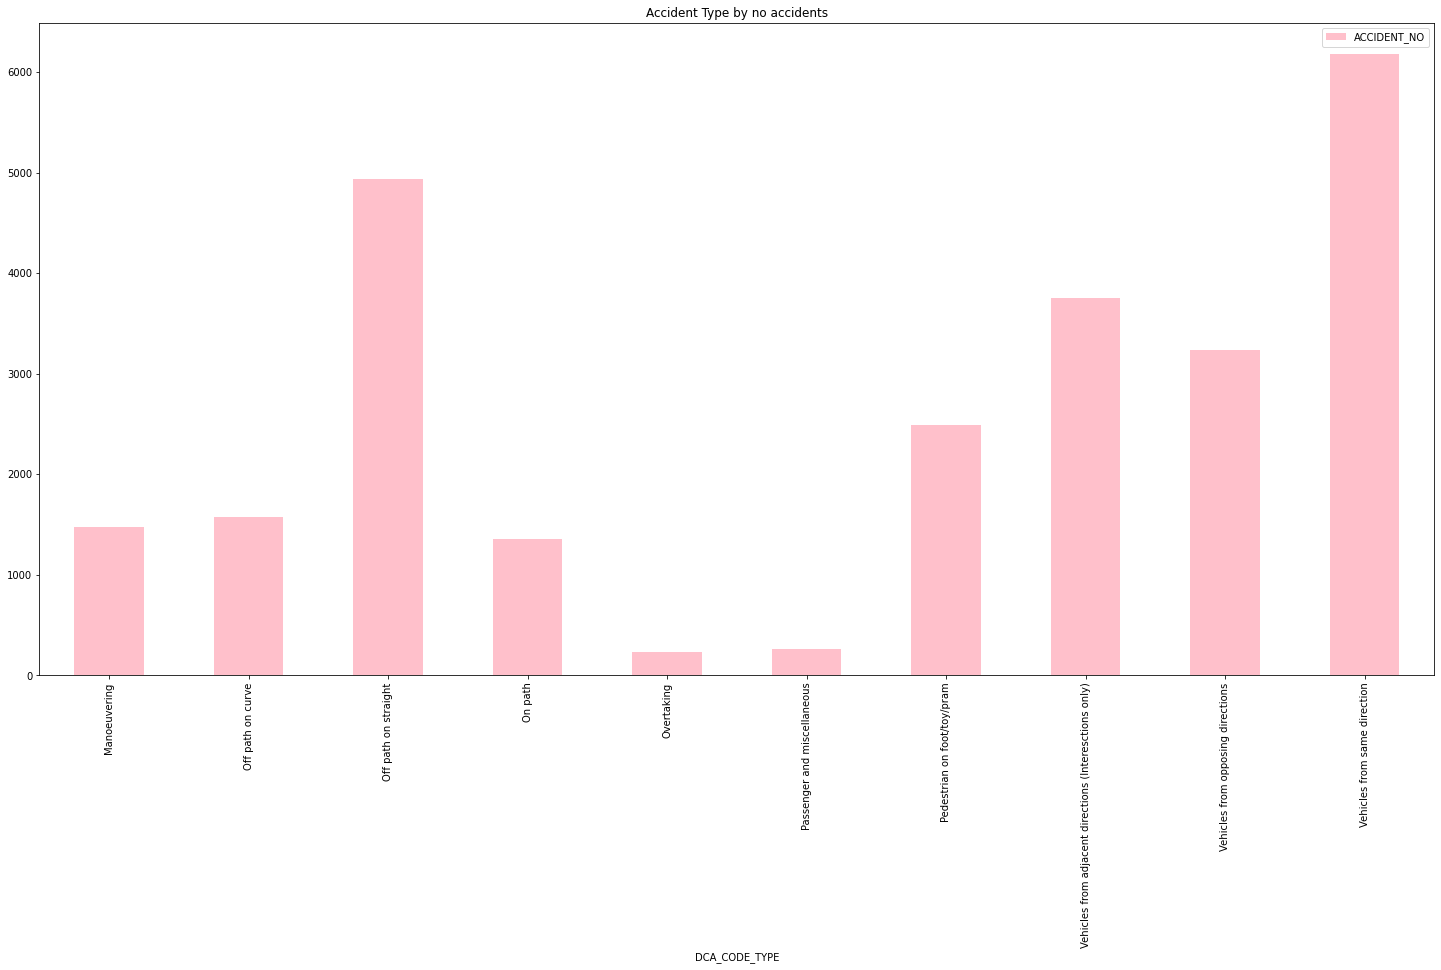

In [235]:
df_new3 = df.groupby(['DCA_CODE_TYPE'])[['ACCIDENT_NO']].count()
df_new3.plot.bar(title='Accident Type by no accidents',color='pink',figsize=(25,12))

##### As seen from above chart most accidents take palce with vehicles travelling in same direction or vehicle going off path on strainght road. This indicates that most vehicles might be travelling at higher speed or might have mis judged the distance between adjecent cars.

<AxesSubplot:title={'center':'Accident Type by no accidents'}, xlabel='DCA_CODE_DESCRIPTION'>

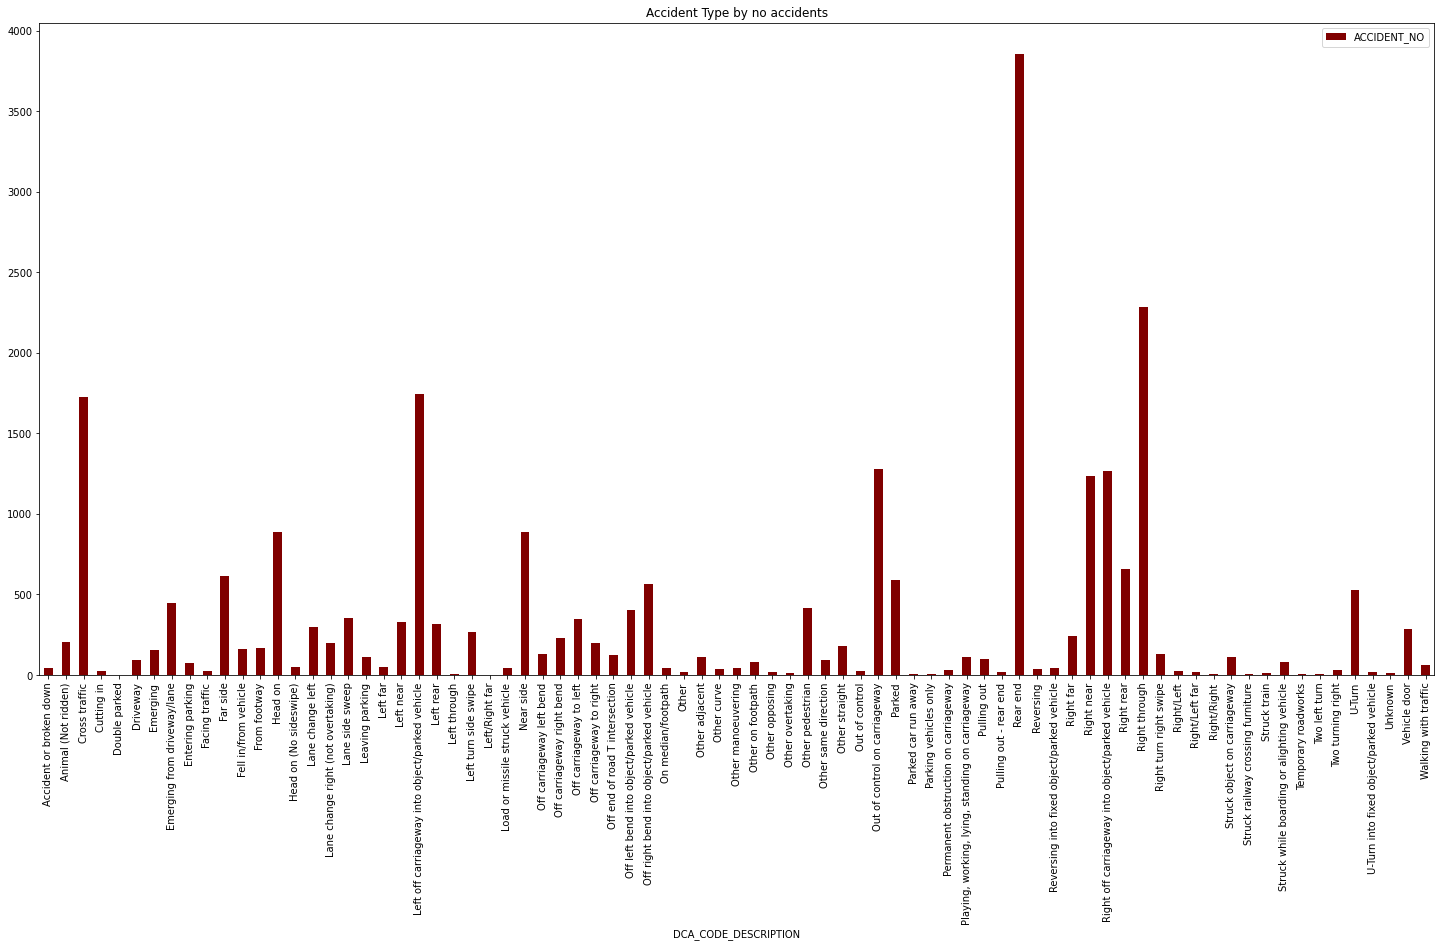

In [257]:
df_new7 = df.groupby(['DCA_CODE_DESCRIPTION'])[['ACCIDENT_NO']].count()
df_new7.plot.bar(title='Accident Type by no accidents',color='maroon',figsize=(25,12))

<AxesSubplot:title={'center':'Road Geometry by no accidents'}, xlabel='ROAD_GEOMETRY_DESCRIPTION'>

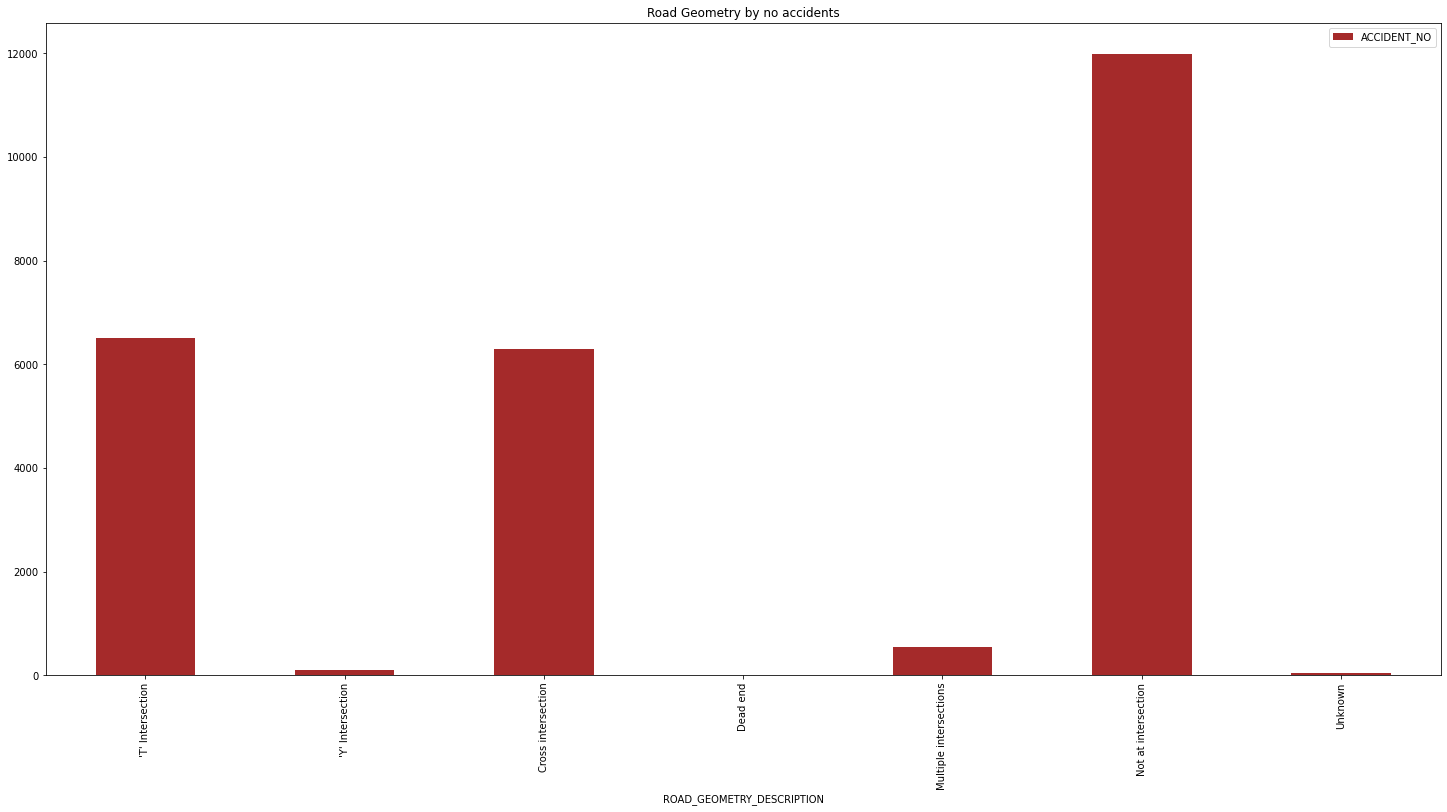

In [255]:
df_new6 = df.groupby(['ROAD_GEOMETRY_DESCRIPTION'])[['ACCIDENT_NO']].count()
df_new6.plot.bar(title='Road Geometry by no accidents',color='brown',stacked=True,figsize=(25,12))